In [ ]:
import scanpy as sc
import numpy as np

# 创建一个测试 AnnData 对象
n_obs = 200
n_vars = 500

# 创建随机表达矩阵
X = np.random.negative_binomial(5, 0.3, (n_obs, n_vars))

# 创建 obs (细胞注释)
obs = pd.DataFrame({
    'cell_type': np.random.choice(['TypeA', 'TypeB', 'TypeC'], n_obs),
    'batch': np.random.choice(['batch1', 'batch2'], n_obs)
})

# 创建 var (基因注释)
var = pd.DataFrame({
    'gene_name': [f'Gene_{i}' for i in range(n_vars)]
})

# 创建 AnnData
test_adata = sc.AnnData(X=X, obs=obs, var=var)

# 添加一些 embedding (用于可视化)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(test_adata.X)
test_adata.obsm['X_pca'] = X_pca

# UMAP (简化版，使用 t-SNE 代替)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca[:, :10])
test_adata.obsm['X_umap'] = X_tsne

print(f"Created AnnData: {test_adata}")
print(f"Shape: {test_adata.shape}")
print(f"Embeddings: {list(test_adata.obsm.keys())}")

Created AnnData: AnnData object with n_obs × n_vars = 200 × 500
    obs: 'cell_type', 'batch'
    var: 'gene_name'
    obsm: 'X_pca', 'X_umap'
Shape: (200, 500)
Embeddings: ['X_pca', 'X_umap']

In [ ]:
import time                                                                                                                                                                                                                                      
for i in range(10):                                                                                                                                                                                                                              
    print(f"Step {i}")                                                                                                                                                                                                                           
    time.sleep(0.5)  

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9


In [ ]:
from __future__ import annotations

import scanpy as sc
from matplotlib.pyplot import rc_context

(执行成功，无输出)

In [ ]:
sc.set_figure_params(dpi=100, color_map="viridis_r")
sc.settings.verbosity = 0
sc.logging.print_header()

Out: scikit-learn	1.4.2
----	----
asttokens	3.0.0
rfc3986-validator	0.1.1
cycler	0.12.1
plotly	5.24.1
flatbuffers	25.2.10
decorator	5.2.1
MarkupSafe	3.0.3
jsonpointer	3.0.0
PyYAML	6.0.3
flask-cors	6.0.1
leidenalg	0.10.2
llvmlite	0.46.0
sphinxcontrib-jsmath	1.0.1
pytz	2025.2
lark	1.3.0
python-dateutil	2.9.0.post0
coverage	7.10.6
rfc3339-validator	0.1.4
prompt_toolkit	3.0.52
stack-data	0.6.3
zope.event	6.1
pillow	12.0.0
psutil	7.1.0
Jinja2	3.1.2
numba	0.63.1
zope.interface	7.2
kiwisolver	1.4.9
texttable	1.7.0
wcwidth	0.2.13
pydot	4.0.1
ipython	8.37.0
regex	2025.10.23
parso	0.8.5
jedi	0.19.2
dill	0.4.0
matplotlib-inline	0.1.7
fastjsonschema	2.21.2
tqdm	4.67.1
pure_eval	0.2.3
six	1.17.0
nvidia-ml-py	12.575.51
python-dotenv	1.0.0
torch	2.7.1
setuptools	80.10.1
natsort	8.4.0
h5py	3.15.1
uri-template	1.3.0
executing	2.2.0
joblib	1.5.2
fqdn	1.5.1
pyarrow	22.0.0
isoduration	20.11.0
igraph	0.11.9
tornado	6.5.2
debugpy	1.8.16
numexpr	2.10.2
scikit-sparse	0.4.16
defusedxml	0.7.1
appnope	0.1.4
kale

In [ ]:
pbmc = sc.datasets.pbmc68k_reduced()
pbmc

Out: AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

(执行成功，无输出)

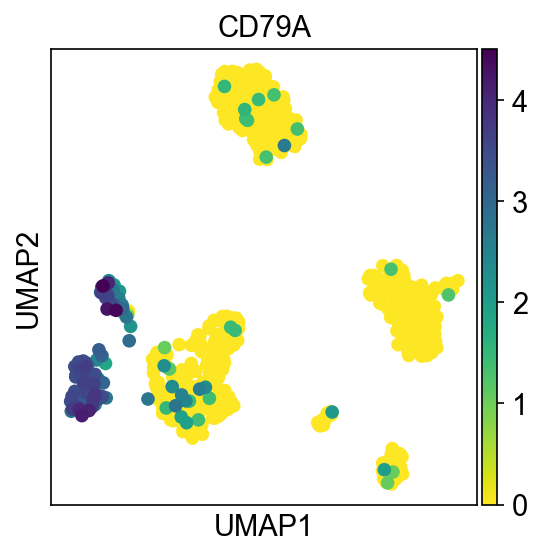

In [ ]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(pbmc, color="CD79A")